In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported !")

Libraries imported !


In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

print("Data Imported !")

Data Imported !


In [3]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [5]:
print(train.shape, " ", test.shape)

(1600, 6)   (400, 5)


In [6]:
train = train.values
test = test.values

In [7]:
x = train[:, 0: 5]
y = train[:, 5]

print(x.shape, " ", y.shape)

(1600, 5)   (1600,)


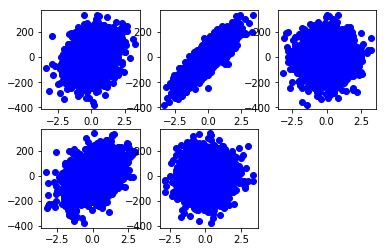

In [8]:
for i in range(5):
    plt.subplot(2,3,i + 1)
    plt.scatter(x[:,i], y, color = 'b')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
print(X_train.shape, " ", X_test.shape)

print(y_train.shape, " ", y_test.shape)

(1280, 5)   (320, 5)
(1280,)   (320,)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[29.77952984 92.53234182  8.45021782 44.3325321   2.52417629]
4.952178763842459


In [14]:
y_pred = reg.predict(X_test)

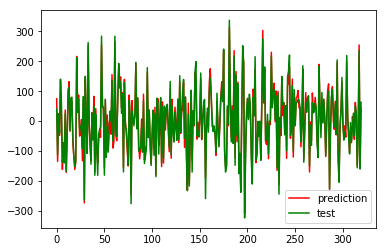

In [15]:
plt.plot(y_pred, color='r', label = 'prediction')
plt.plot(y_test, color = 'g', label = "test")
plt.legend()
plt.show()

In [16]:
lr = LinearRegression()
lr.fit(x, y)

print(lr.coef_)
print(lr.intercept_)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
4.990966735574959


In [17]:
print(test.shape)

(400, 5)


In [18]:
pred = lr.predict(test)

In [19]:
Id = [x for x in range(400)]

sol = pd.DataFrame({
    'Id' : Id,
    'target' : pred
})

sol.head()

,Id,target
0,0,114.583689
1,1,118.012815
2,2,-21.739852
3,3,-43.936899
4,4,-95.914898


In [20]:
sol.to_csv('solution.csv', index = False)

In [52]:
from sklearn.preprocessing import PolynomialFeatures

vector = y
predict = test

print(x.shape, vector.shape, predict.shape)

(1600, 5) (1600,) (400, 5)


In [53]:
poly = PolynomialFeatures(degree = 2)
x_ = poly.fit_transform(x)
predict_ = poly.fit_transform(predict)

lr2 = LinearRegression()
lr2.fit(x_, vector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print(lr2.coef_)
print(lr2.intercept_)

[ 0.00000000e+00  2.97295513e+01  9.26457524e+01  8.21749696e+00
  4.47631023e+01  2.54121304e+00 -2.55591123e-01 -1.78514727e-02
  4.93132844e-01 -1.49511254e-02  1.29408870e-01 -4.02598208e-01
  5.99366419e-02  1.45149620e-01  9.62364501e-01 -6.72889344e-01
  1.58351035e-01 -4.59052553e-01 -2.98339053e-01 -8.60702186e-01
 -7.70725467e-02]
6.70470422048459


In [55]:
prediction = lr2.predict(predict_)

In [57]:
prediction.shape

(400,)

In [58]:
Id = [x for x in range(400)]

sol2 = pd.DataFrame({
    'Id' : Id,
    'target' : prediction
})

sol2.head()

,Id,target
0,0,107.409603
1,1,118.924822
2,2,-20.642044
3,3,-46.017654
4,4,-96.741514


In [59]:
sol2.to_csv('solution_polynomial.csv', index = False)